In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = './final_data_with_crime_severity.csv'
data = pd.read_csv(file_path)

data.head

,Unnamed: 0,index,zipcode,num_felony,num_violation,num_misdemeanor,most_freq_ofns_desc,most_freq_loc_occur,most_freq_prem_type,most_freq_susp_age_group,...,num_total_crimes,median_income,unemployment_rate,num_stopandfrisk,num_police_station,num_restroom,num_bus_stops,num_subway_stations,population,crime_severity
0,0,0,10001.0,2918,734,3677,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,7329,106509.0,4.3,92,1,8,16,7,24448,4
1,1,1,10002.0,2278,1024,4381,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,7683,43362.0,7.6,109,1,16,33,5,67647,4
2,2,2,10003.0,1865,453,3066,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,5384,152863.0,4.7,82,2,5,13,7,50402,3
3,3,3,10004.0,143,70,229,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,442,232543.0,0.4,7,1,3,1,3,3739,1
4,4,4,10005.0,219,76,963,PETIT LARCENY,INSIDE,CHAIN STORE,UNKNOWN,...,1258,189886.0,3.4,7,0,0,2,2,7877,1


In [ ]:
# Load the dataset
file_path = './final_data_with_crime_severity.csv'
data = pd.read_csv(file_path)

# Drop irrelevant columns (e.g., non-numeric, identifiers, etc.)
irrelevant_cols = ['Unnamed: 0', 'index', 'most_freq_ofns_desc', 
                   'most_freq_loc_occur', 'most_freq_prem_type',
                   'most_freq_susp_age_group', 'most_freq_susp_race', 
                   'most_freq_susp_sex', 'most_freq_vic_age_group', 
                   'most_freq_vic_race', 'most_freq_vic_sex']
data = data.drop(columns=irrelevant_cols, errors='ignore')

# Drop rows with missing values
data = data.dropna()

# Separate features (X) and target variable (y)
X = data.drop(columns=['crime_severity', 'zipcode'])
y = data['crime_severity']

# Ensure the target variable is categorical
y = y.astype('int')


In [117]:
# Split into train (60%), validation (20%), and test (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)


In [121]:
# Initialize the Random Forest model with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
val_pred = rf_model.predict(X_val)

# Evaluate the model using accuracy and classification report
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("\nClassification Report on Validation Set:\n", classification_report(y_val, val_pred))

# Make predictions on the test set
test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, test_pred))


Validation Accuracy: 0.8333333333333334

Classification Report on Validation Set:
               precision    recall  f1-score   support

           1       0.82      1.00      0.90        18
           2       1.00      0.38      0.55         8
           3       0.50      0.67      0.57         3
           4       1.00      1.00      1.00         7

    accuracy                           0.83        36
   macro avg       0.83      0.76      0.75        36
weighted avg       0.87      0.83      0.81        36

Test Accuracy: 0.9166666666666666

Classification Report on Test Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      0.91      0.91        11
           3       1.00      0.88      0.93         8
           4       0.82      0.90      0.86        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.

In [110]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


In [ ]:
best_params = None
best_score = 0
best_model = None

# Calculate total iterations for progress tracking
total_iterations = (
    len(param_grid['n_estimators']) *
    len(param_grid['max_depth']) *
    len(param_grid['min_samples_leaf']) *
    len(param_grid['max_features']) *
    # len(param_grid['class_weight']) *
    len(param_grid['bootstrap']) *
    len(param_grid['criterion'])
)
current_iteration = 0

print(f"Starting hyperparameter tuning: {total_iterations} combinations to evaluate.\n")

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for max_features in param_grid['max_features']:
                # for class_weight in param_grid['class_weight']:
                    for bootstrap in param_grid['bootstrap']:
                        for criterion in param_grid['criterion']:
                            # Increment iteration counter
                            current_iteration += 1

                            # Train the model with the current set of hyperparameters
                            rf_model = RandomForestClassifier(
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                # class_weight=class_weight,
                                bootstrap=bootstrap,
                                criterion=criterion,
                                random_state=42
                            )
                            rf_model.fit(X_train, y_train)
                            
                            # Evaluate on the validation set
                            val_pred = rf_model.predict(X_val)
                            val_score = accuracy_score(y_val, val_pred)
                            
                            # Print progress and parameters
                            print(f"Iteration {current_iteration}/{total_iterations}")
                            print(f"Params: n_estimators={n_estimators}, max_depth={max_depth}, "
                                  f"min_samples_leaf={min_samples_leaf}, max_features={max_features}, "
                                  f"bootstrap={bootstrap}, "
                                  f"criterion={criterion} | Validation Score: {val_score:.4f}\n")
                            
                            # Update best parameters if current score is better
                            if val_score > best_score:
                                best_score = val_score
                                best_params = {
                                    'n_estimators': n_estimators,
                                    'max_depth': max_depth,
                                    'min_samples_leaf': min_samples_leaf,
                                    'max_features': max_features,
                                    # 'class_weight': class_weight,
                                    'bootstrap': bootstrap,
                                    'criterion': criterion,
                                }
                                best_model = rf_model

# Output the best parameters and score
print("\nHyperparameter tuning complete.")
print(f"Best Parameters: {best_params}")
print(f"Best Validation Score: {best_score:.4f}")


Starting hyperparameter tuning: 432 combinations to evaluate.

Iteration 1/432
Params: n_estimators=100, max_depth=None, min_samples_leaf=1, max_features=sqrt, class_weight=None, bootstrap=True, criterion=gini | Validation Score: 0.8333

Iteration 2/432
Params: n_estimators=100, max_depth=None, min_samples_leaf=1, max_features=sqrt, class_weight=None, bootstrap=True, criterion=entropy | Validation Score: 0.9444

Iteration 3/432
Params: n_estimators=100, max_depth=None, min_samples_leaf=1, max_features=sqrt, class_weight=None, bootstrap=False, criterion=gini | Validation Score: 0.8611

Iteration 4/432
Params: n_estimators=100, max_depth=None, min_samples_leaf=1, max_features=sqrt, class_weight=None, bootstrap=False, criterion=entropy | Validation Score: 0.9167

Iteration 5/432
Params: n_estimators=100, max_depth=None, min_samples_leaf=1, max_features=log2, class_weight=None, bootstrap=True, criterion=gini | Validation Score: 0.8333

Iteration 6/432
Params: n_estimators=100, max_depth=No

In [123]:
# Use the best model on the test set
test_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Best Model:", best_score)
print("Test Accuracy with Best Model:", test_score)


Best Hyperparameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}
Validation Accuracy with Best Model: 0.9444444444444444
Test Accuracy with Best Model: 0.9444444444444444


In [126]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


                Feature  Importance
1         num_violation    0.146099
0            num_felony    0.144002
2       num_misdemeanor    0.134267
3      num_total_crimes    0.127799
8          num_restroom    0.100953
6      num_stopandfrisk    0.082372
11           population    0.064381
7    num_police_station    0.059579
4         median_income    0.052072
9         num_bus_stops    0.034922
5     unemployment_rate    0.029146
10  num_subway_stations    0.024409


In [124]:
# Get probabilities for AUC calculation
val_proba = best_model.predict_proba(X_val)
test_proba = best_model.predict_proba(X_test)

# Compute AUC score
val_auc = roc_auc_score(y_val, val_proba, multi_class='ovr')
test_auc = roc_auc_score(y_test, test_proba, multi_class='ovr')

print(f"Validation AUC Score: {val_auc}")
print(f"Test AUC Score: {test_auc}")


Validation AUC Score: 0.9988839285714286
Test AUC Score: 0.994493006993007


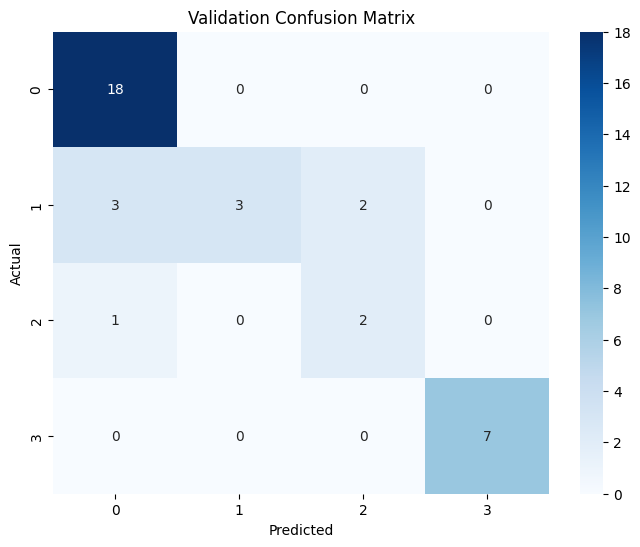

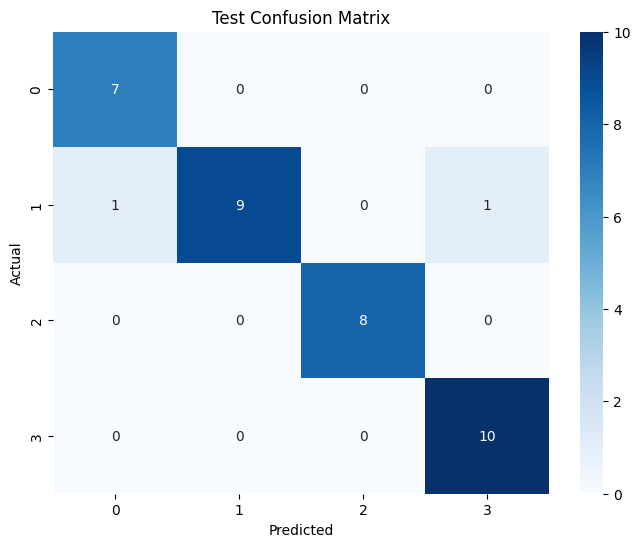

In [125]:
# Compute confusion matrix for validation set
val_cm = confusion_matrix(y_val, val_pred)

# Compute confusion matrix for test set
test_cm = confusion_matrix(y_test, test_pred)

# Visualize confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('./visuals/rf {}.png'.format(title))
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(val_cm, "Validation Confusion Matrix")
plot_confusion_matrix(test_cm, "Test Confusion Matrix")
